In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

url = 'https://github.com/rpmunoz/PentaUC/raw/master/Astronomia%20era%20informacion/data/P3asteroides.csv'
data = pd.read_csv(url, sep=',', comment='#', header=0)
data.head()

,Nombre,a,color_a,mag_i,mag_z,x,y,z,e,sin_i
0,1989_SS,3.025812,0.05,17.10,17.05,1.214,-2.976,0.570,0.0856,0.2121
1,Helenos,5.297075,-0.01,17.79,17.67,1.329,5.143,-1.275,NaN,NaN
2,2003_YD179,5.300624,0.04,20.07,19.97,1.203,5.328,0.549,NaN,NaN
3,2007_EW43,5.162462,-0.05,20.21,20.41,1.908,5.004,-1.534,NaN,NaN
4,1989_UE5,5.170706,0.07,20.03,19.96,1.915,4.811,-1.037,NaN,NaN


[(-0.5, 0.5), (-0.5, 0.5), None]

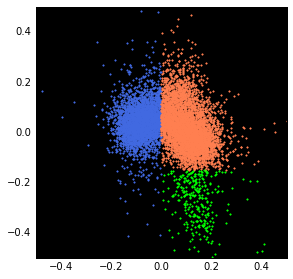

In [2]:
A  = data['color_a'] + 1e-2*np.random.normal(0, 1, len(data))
iz = data['mag_i'] - data['mag_z'] + 1e-2*np.random.normal(0, 1, len(data))

clase_C = A < 0
clase_S = (iz > -.15) & (A > 0) & (A < 1)
clase_V = (iz < -.15) & (A > 0) & (A < 1)
clases  = [clase_C, clase_S, clase_V]
colores = ['royalblue', 'coral', 'lime']

fig, ax = plt.subplots(figsize=[4*1.5,3*1.5])
ax.patch.set_facecolor('black')
for i, clase in enumerate(clases):
    ax.plot(A[clase], iz[clase], '.', color=colores[i], ms=3)
ax.set(xlim=(-.5, .5), ylim=(-.5, .5), aspect='equal')

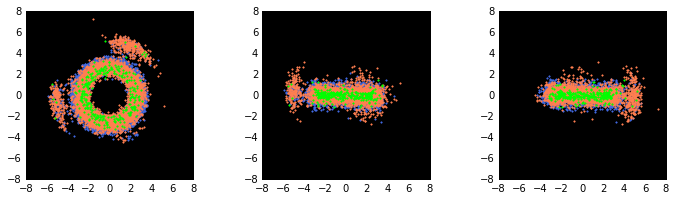

In [3]:
x = data['x']
y = data['y']
z = data['z']

fig, ax = plt.subplots(figsize=[12,3], ncols=3)
for i, clase in enumerate(clases):
    ax[0].plot(x[clase], y[clase], '.', color=colores[i], ms=3)
    ax[1].plot(x[clase], z[clase], '.', color=colores[i], ms=3)
    ax[2].plot(y[clase], z[clase], '.', color=colores[i], ms=3)

for a in ax:
    a.set_xlim(-8, 8)
    a.set_ylim(-8, 8)
    a.set_aspect('equal')
    a.patch.set_facecolor('black')


In [4]:
url = 'https://github.com/rpmunoz/PentaUC/raw/master/Astronomia%20era%20informacion/data/P3solarsys.csv'
solarsys = pd.read_csv(url, sep=',', comment='#', header=0)
solarsys.head()

,Nombre,masa,d,rho,a,e,i,alb
0,Mercurio,3.300000e+23,4879,5427,0.387,0.205,7.0,0.10
1,Venus,4.860000e+24,12104,5243,0.723,0.007,3.4,0.65
2,Tierra,5.970000e+24,12756,5514,1.000,0.017,0.0,0.39
3,Marte,6.420000e+23,6792,3933,1.520,0.094,1.9,0.15
4,Jupiter,1.898000e+27,142984,1326,5.200,0.049,1.3,0.52


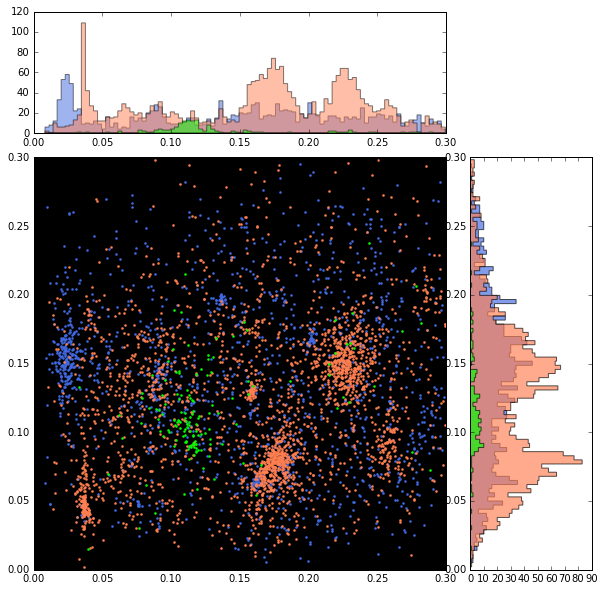

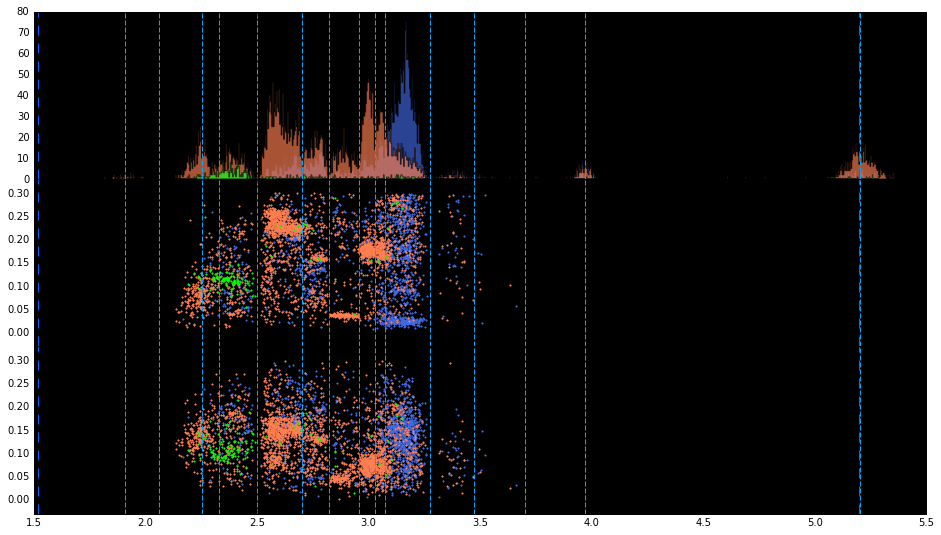

In [5]:
e    = data['e'][np.isfinite(data['e'])]
sini = data['sin_i'][np.isfinite(data['sin_i'])]
be = np.linspace(e.min(), e.max(), 100)
bi = np.linspace(sini.min(), sini.max(), 100)


fig = plt.figure(figsize=[10,10])
gs  = gridspec.GridSpec(4,4)
axh = plt.subplot(gs[1:,:-1])
axu = plt.subplot(gs[0,:-1])
axd = plt.subplot(gs[1:,-1])

axh.patch.set_facecolor('black')

for i, clase in enumerate(clases):
    e    = data['e'][clase & np.isfinite(data['e'])]
    sini = data['sin_i'][clase & np.isfinite(data['sin_i'])]
    
    _ = axd.hist(e, bins=be, histtype='stepfilled', orientation='horizontal', alpha=.66, color=colores[i])
    _ = axu.hist(sini, bins=bi, histtype='stepfilled', alpha=.5, color=colores[i])
    axh.plot(data['sin_i'][clase], data['e'][clase], '.', color=colores[i], ms=4)

    
Pj = 11.86
P  = np.array([1, 2/9., 1/4., 2/7., 1/3., 3/8., 2/5., 3/7., 1/2., 3/5., 6/11., 5/11., 4/9., 3/10., 2/3.]) * Pj
aP = P**(2/3.)

fig, ax = plt.subplots(figsize=[4*4, 3*3], nrows=3, sharex=True)
fig.subplots_adjust(hspace=0)
for i, clase in enumerate(clases):
    _ = ax[0].hist(data['a'][clase], bins=1000, histtype='stepfilled', color=colores[i], alpha=.66)   
    ax[1].plot(data['a'][clase], data['sin_i'][clase], '.', color=colores[i], ms=3)
    ax[2].plot(data['a'][clase], data['e'][clase], '.', color=colores[i], ms=3)
    
    ax[1].set_ylim(-0.03, 0.33)
    ax[2].set_ylim(-0.03, 0.33)

for a in ax:
    a.axvline(solarsys[' a'][3], color='#0066FF', dashes=(10,8))
    a.axvline(solarsys[' a'][4], color='#0066FF', dashes=(10,8))
    a.patch.set_facecolor('black')
    for p in aP:
        a.axvline(p, dashes=(5,2), color='#00AAFF')




In [6]:
url = 'https://github.com/rpmunoz/PentaUC/raw/master/Astronomia%20era%20informacion/data/P3mag_hal.csv'
data2 = pd.read_csv(url, sep=',', comment='#', header=0)
data2.head()

,Nombre,H,A
0,1 Ceres,3.34,0.0900
1,2 Pallas,4.13,0.1587
2,3 Juno,5.33,0.2383
3,4 Vesta,3.20,0.4228
4,5 Astraea,6.85,0.2268


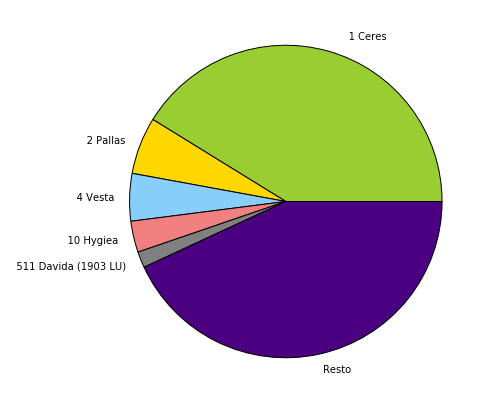

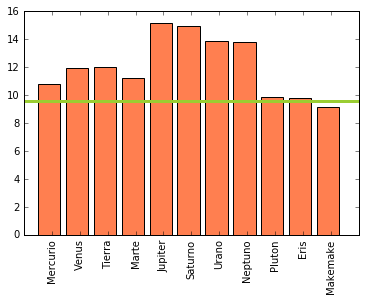

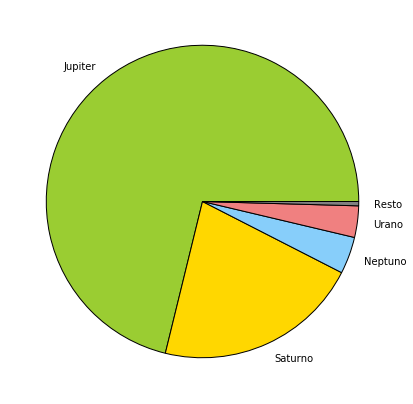

In [7]:
radios  = 1329*10**(-0.2*data2['H'])/np.sqrt(data2['A'])
volumen = (4/3.)*np.pi*radios**3

orden = np.argsort(volumen)[::-1]
label = np.hstack([data2['Nombre'][orden][:5], 'Resto'])
newv  = np.hstack([volumen[orden][:5], np.sum(volumen[5:])])
pieco = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'gray', 'indigo']

fig, ax = plt.subplots(figsize=[7,7])
_ = ax.pie(newv, labels=label, colors=pieco)
ax.set_aspect('equal')

volss = (4/3.)*np.pi*(solarsys[' d']/2.)**3

fig, ax = plt.subplots()
ax.bar(np.arange(len(volss)), np.log10(volss), color='coral')
ax.axhline(np.log10(newv[0]), color='yellowgreen', lw=3)
ax.set_xticks(np.arange(len(volss)) + .5)
ax.set_xticklabels(solarsys['Nombre'], rotation=90)
ax.set_xlim(-.5, 11.5)

fig, ax = plt.subplots(figsize=[7,7])
sortm = np.argsort(solarsys[' masa'])[::-1]
newm  = np.hstack([solarsys[' masa'][sortm][:4], np.sum(solarsys[' masa'][sortm][4:])])
labm  = np.hstack([solarsys['Nombre'][sortm][:4], 'Resto'])
_ = ax.pie(newm, labels=labm, colors=pieco)
ax.set_aspect('equal')